In [36]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/хг_2023_2025.csv')
df.head()

,соревнование,дата_проведения,имя,год_рождения,регион,разряд,категория,вид1,вид2,вид3,вид4,сумма,место
0,Первенство России,2023-02-12,Проценко Юлия,2011,Москва,1 разряд,юниорка,32.40,32.6,31.70,33.50,130.20,1
1,Первенство России,2023-02-12,Репина Анна,2011,Москва,1 разряд,юниорка,29.80,34.0,30.90,34.35,129.05,2
2,Первенство России,2023-02-12,Гераськина Елизавета,2011,Москва,1 разряд,юниорка,28.95,33.5,30.65,33.65,126.75,3
3,Первенство России,2023-02-12,Яблочкина Кира,2011,ДФО,1 разряд,юниорка,29.60,34.3,30.60,32.00,126.50,4
4,Первенство России,2023-02-12,Савинова Ксения,2011,СЗФО,1 разряд,юниорка,29.80,30.0,29.95,31.00,120.75,5


In [37]:
df=df.rename(columns={'соревнование':'competition','дата_проведения':'competition_date','имя':'name',
                   'год_рождения':'year_of_birth','регион':'region','разряд':'rank','категория':'category',
                   'вид1':'score1','вид2':'score2','вид3':'score3','вид4':'score4','сумма':'total','место':'place'})

In [38]:
df_j=df[df['category']=='юниорка']
df_s=df[df['category']=='сениорка']

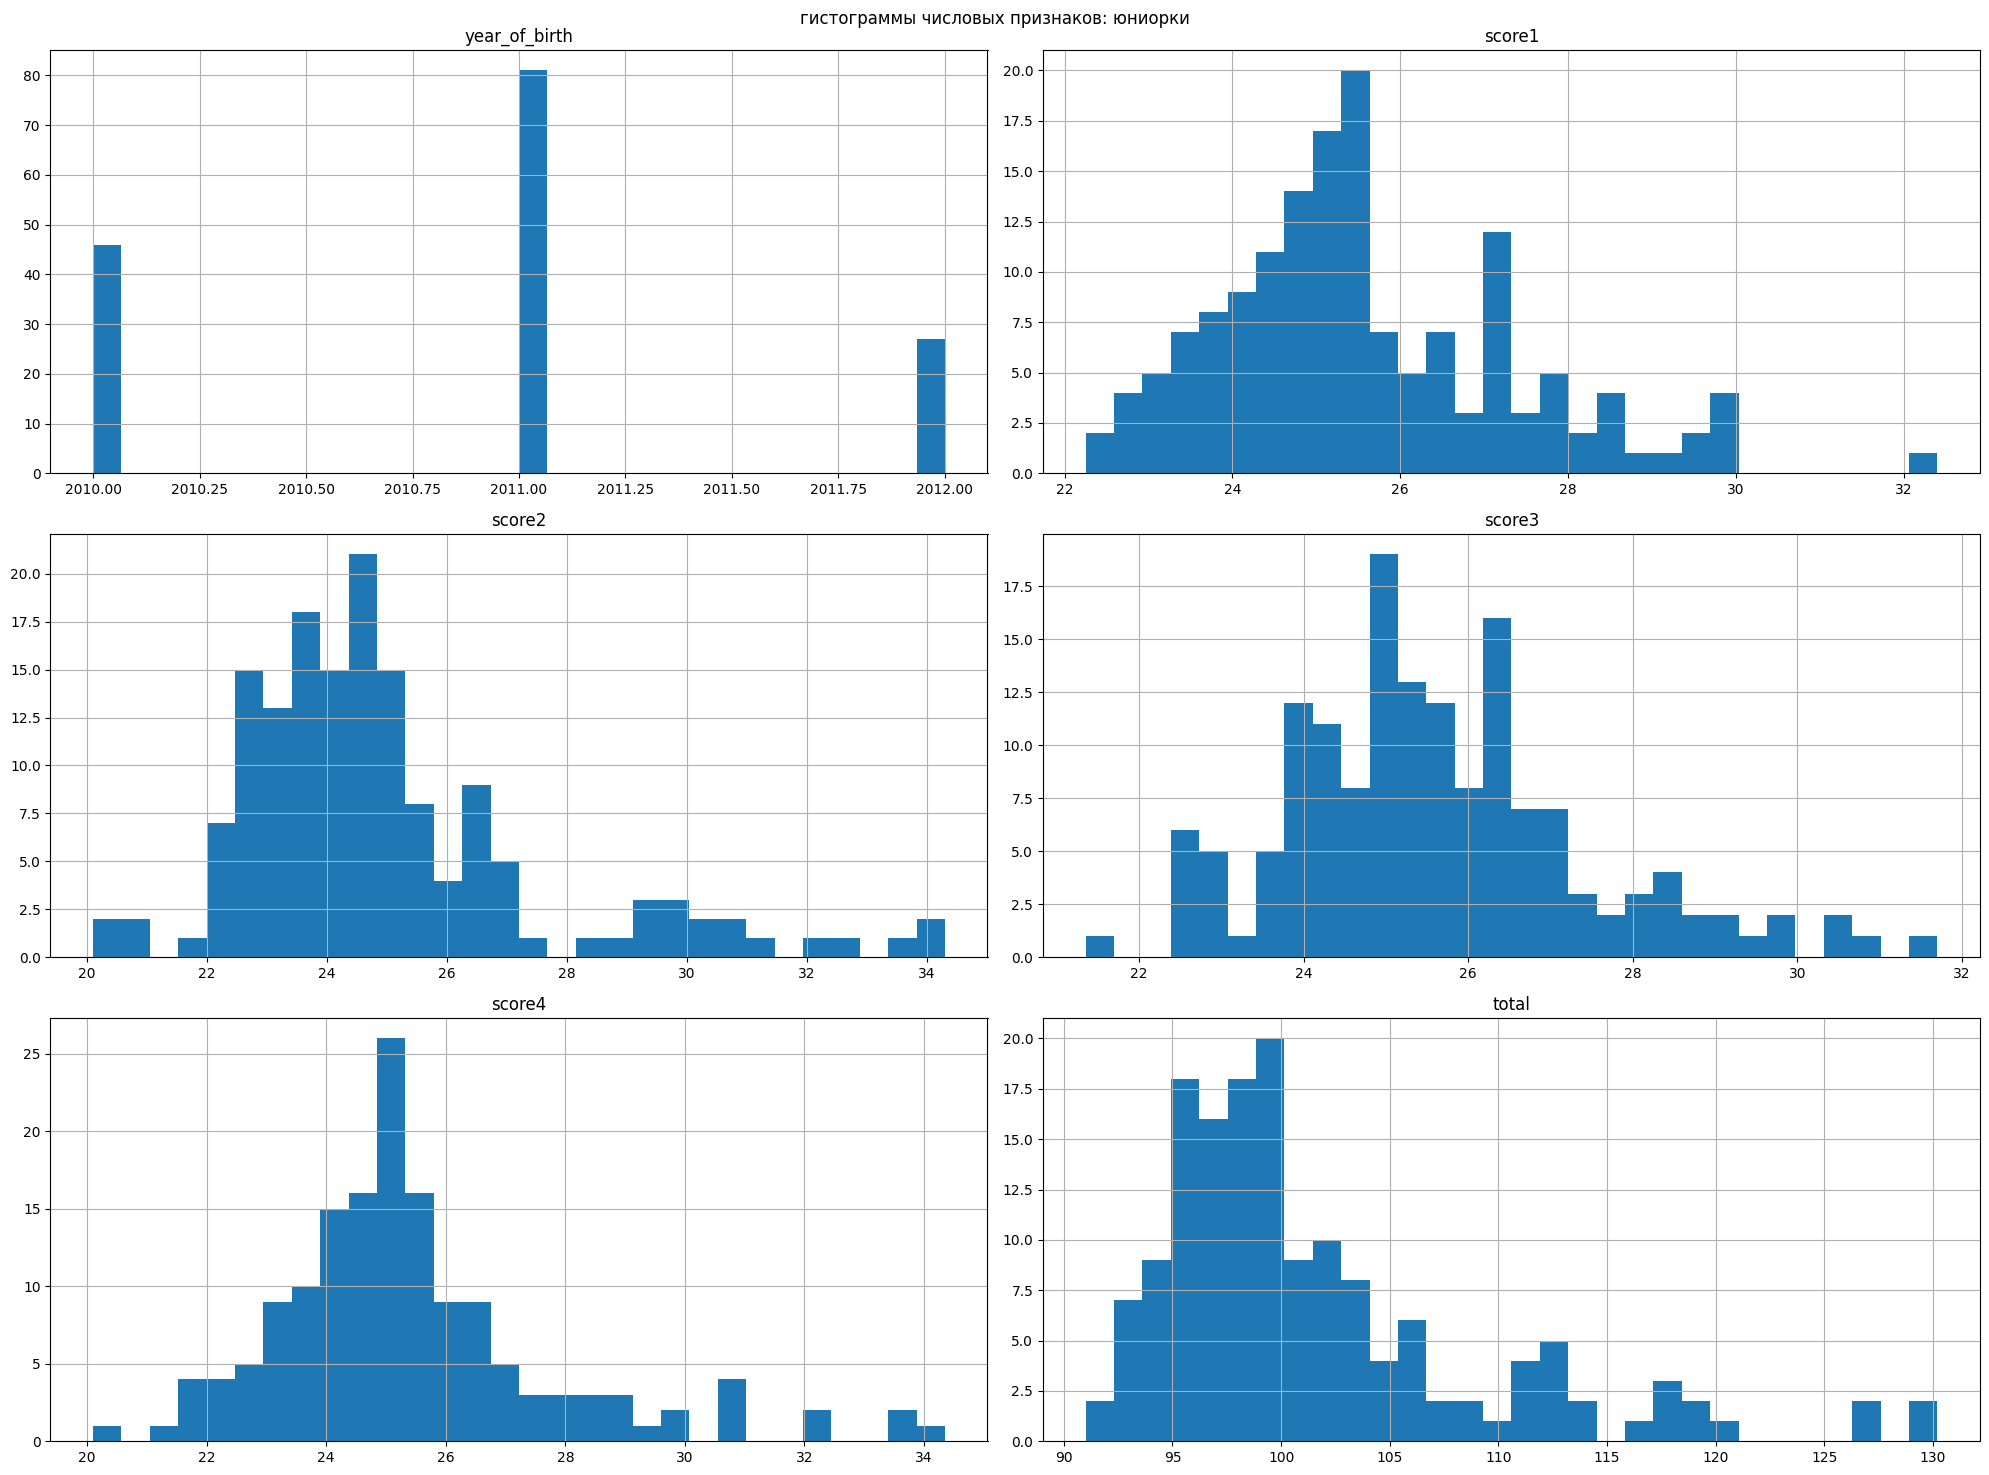

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features=['year_of_birth','score1','score2','score3','score4','total']

df_j[num_features].hist(bins=30,figsize=(20,15))
plt.suptitle('гистограммы числовых признаков: юниорки')
plt.tight_layout()

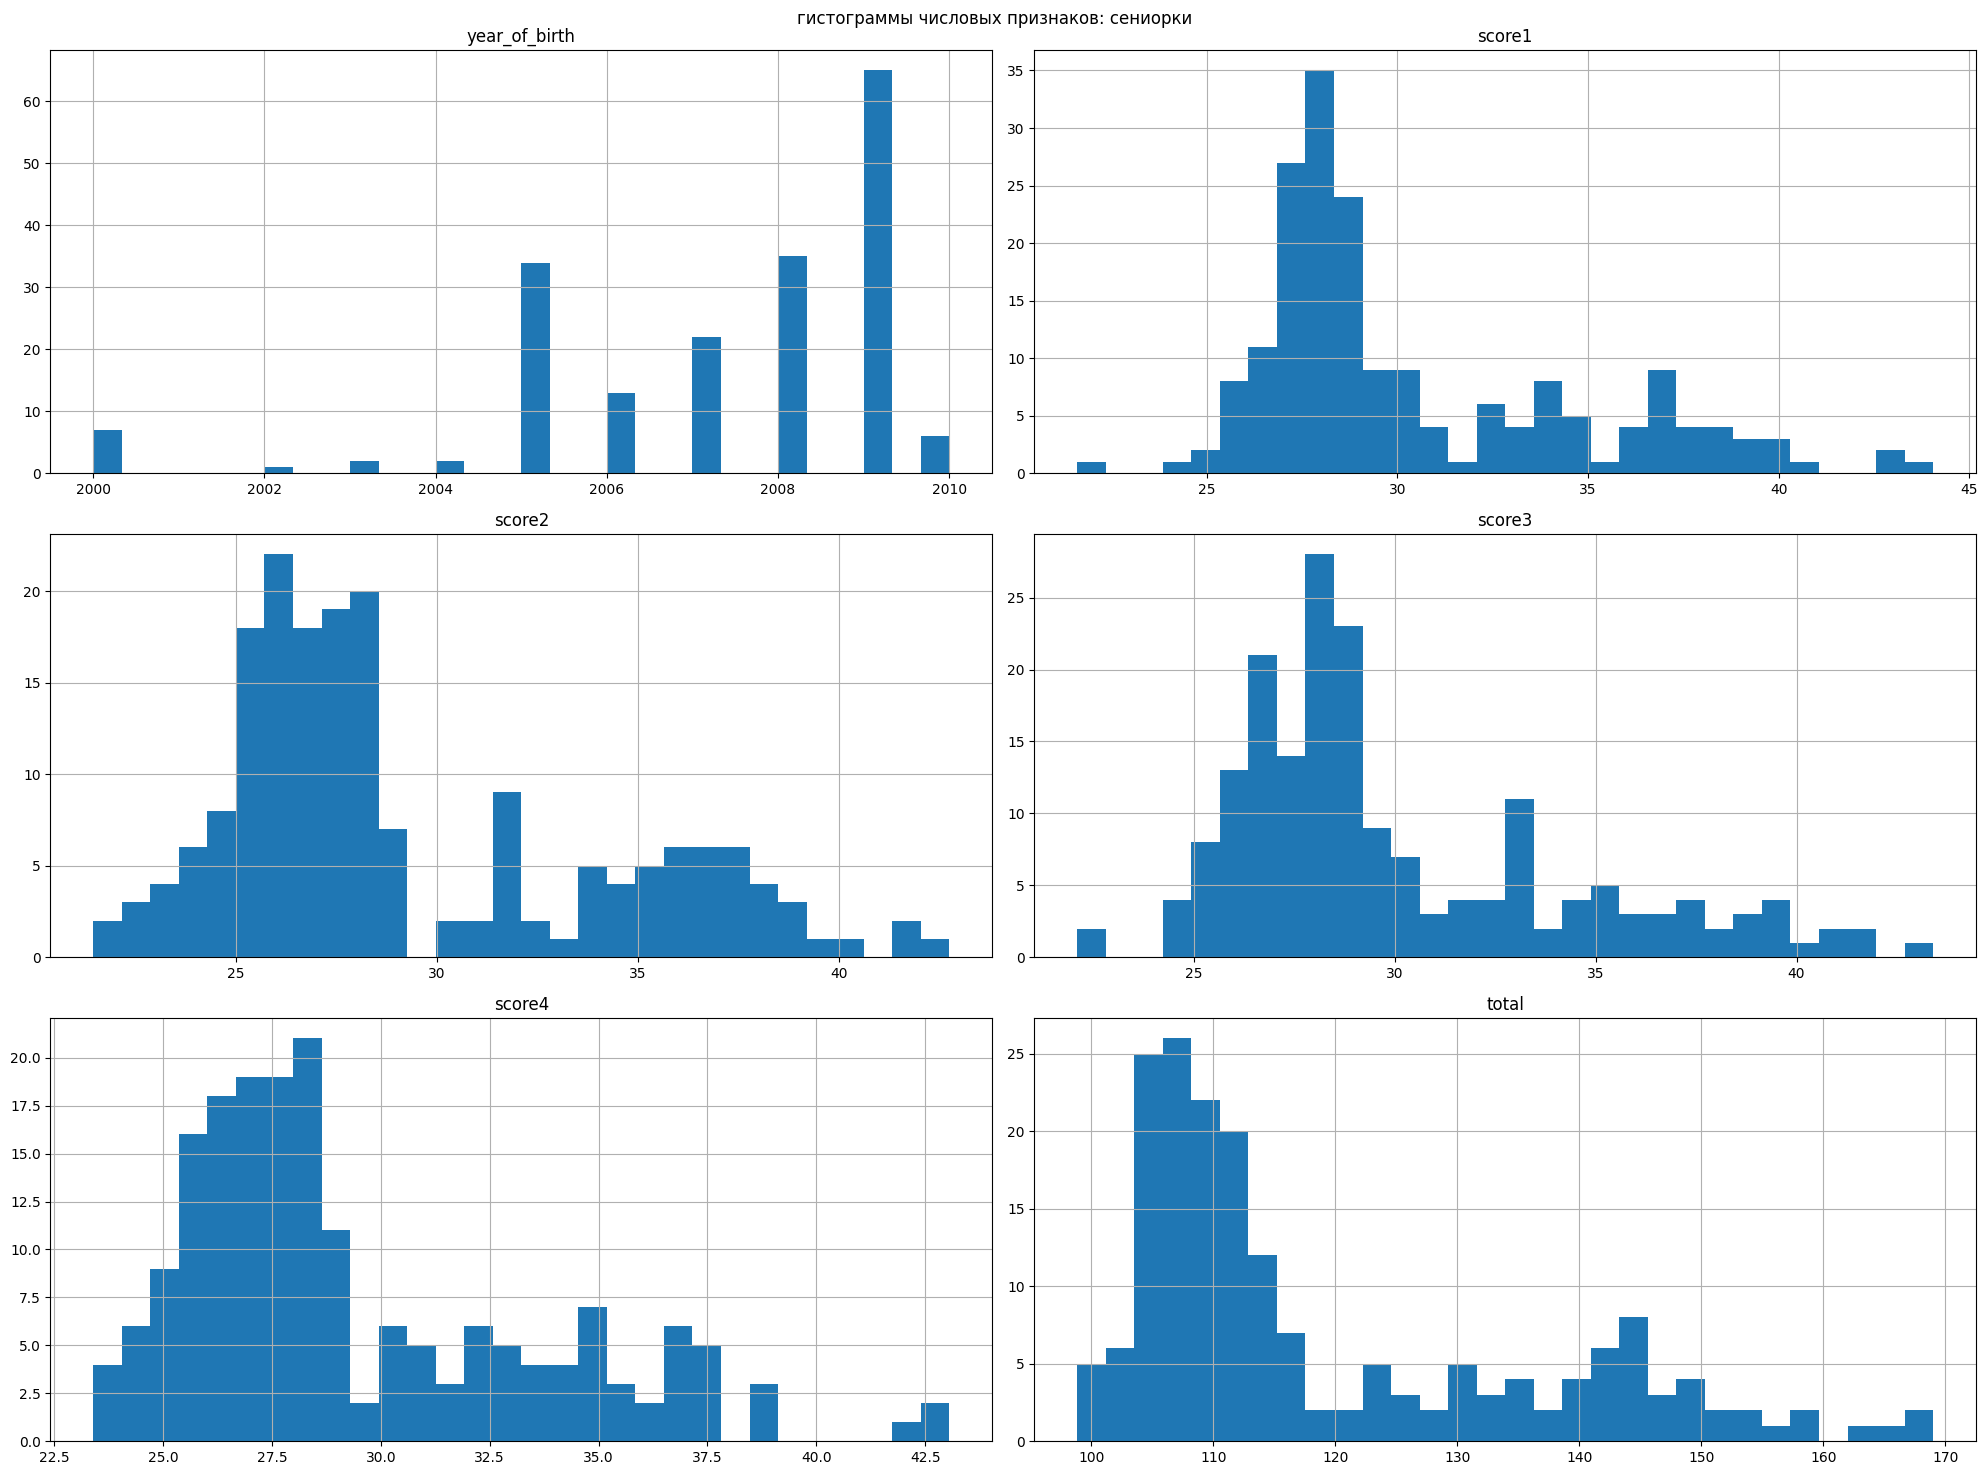

In [41]:
df_s[num_features].hist(bins=30,figsize=(20,15))
plt.suptitle('гистограммы числовых признаков: сениорки')
plt.tight_layout()

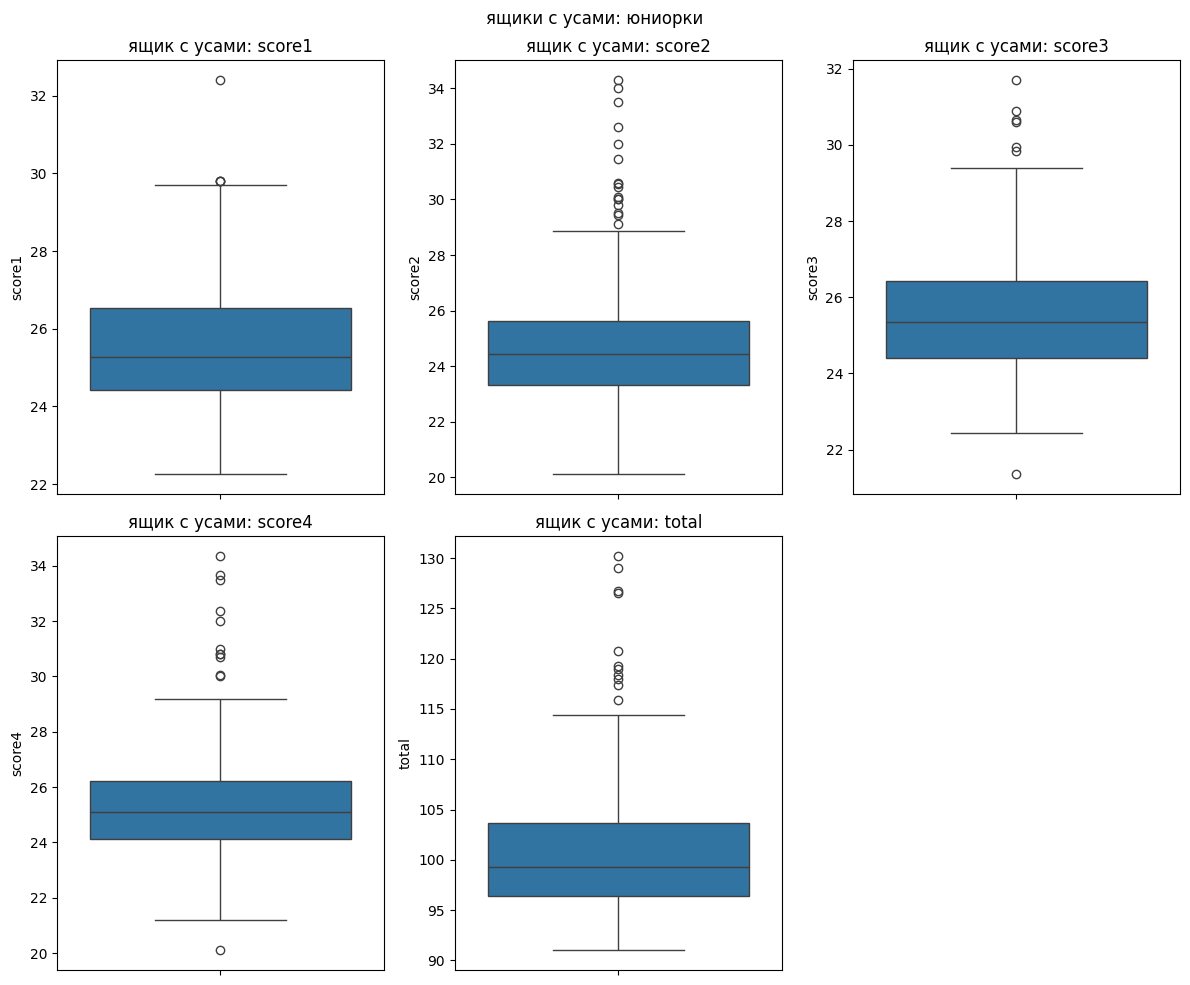

In [42]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_features[1:],1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df_j,y=col)
  plt.title(f'ящик с усами: {col}')
plt.suptitle('ящики с усами: юниорки')
plt.tight_layout()

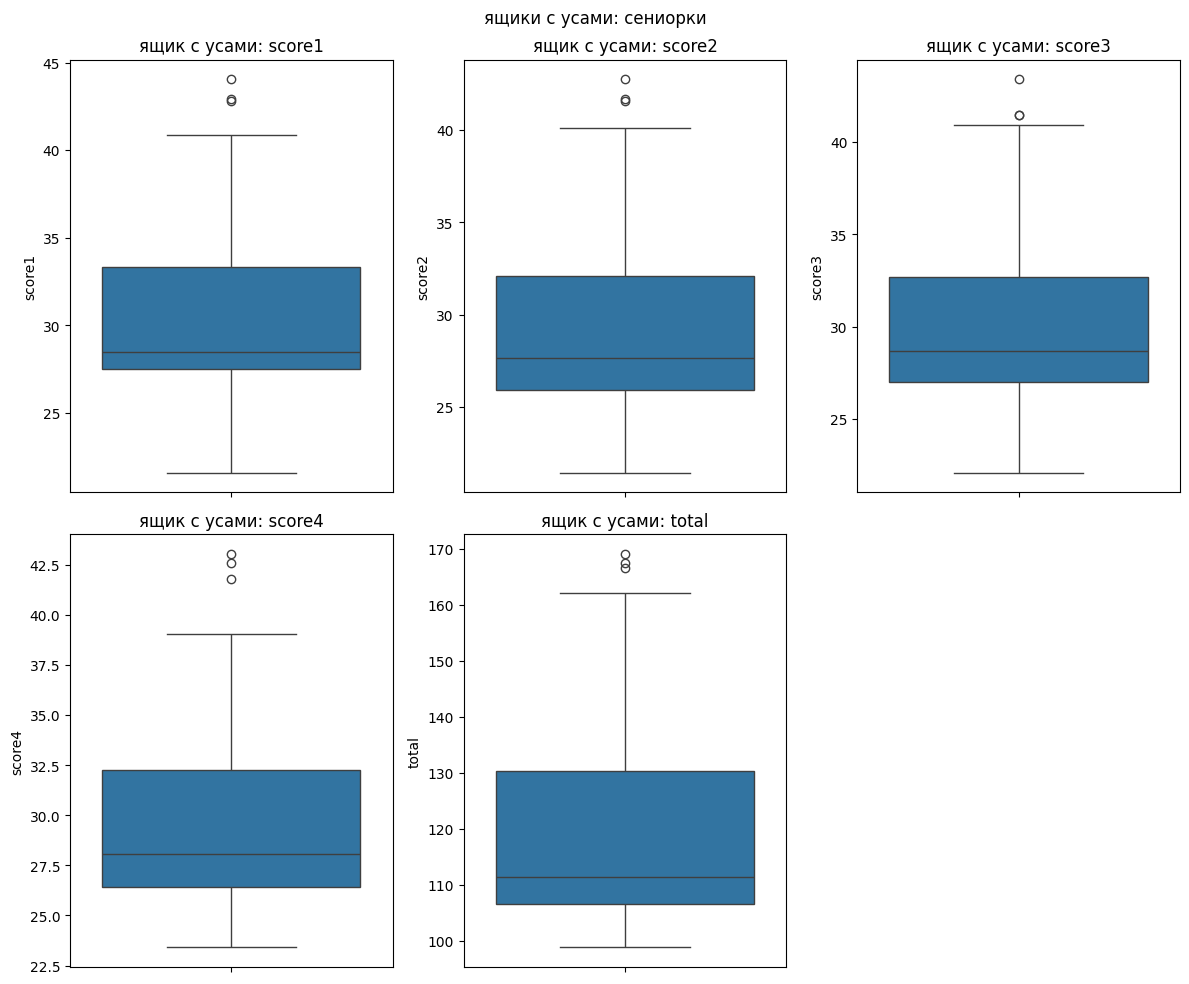

In [43]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_features[1:],1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df_s,y=col)
  plt.title(f'ящик с усами: {col}')
plt.suptitle('ящики с усами: сениорки')
plt.tight_layout()

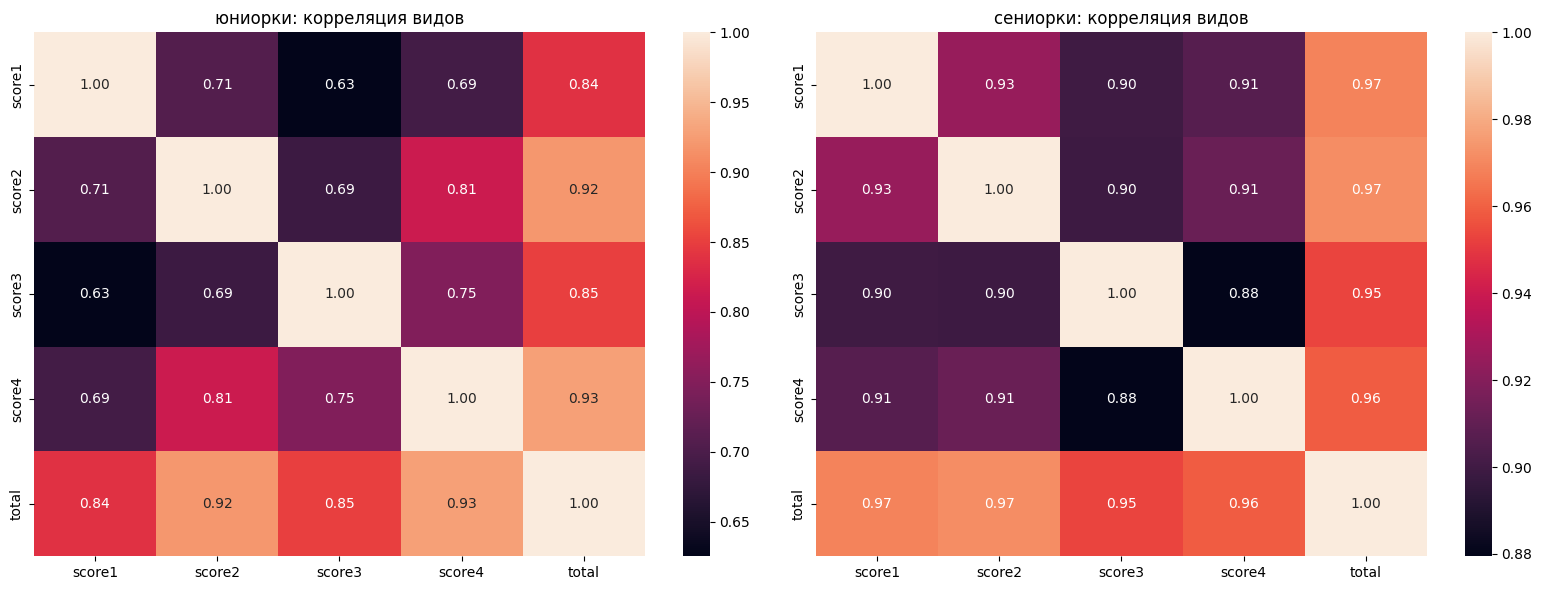

In [44]:
# корреляция ддя каждой категории

fig, axes=plt.subplots(1,2,figsize=(16,6))

corr_features=num_features[1:]

# юниорки
corr_j=df_j[corr_features].corr()
sns.heatmap(corr_j,annot=True,fmt='.2f', ax=axes[0])
axes[0].set_title('юниорки: корреляция видов')

#сениорки
corr_s=df_s[corr_features].corr()
sns.heatmap(corr_s,annot=True,fmt='.2f',ax=axes[1])
axes[1].set_title('сениорки: корреляция видов')

plt.tight_layout()
plt.show()

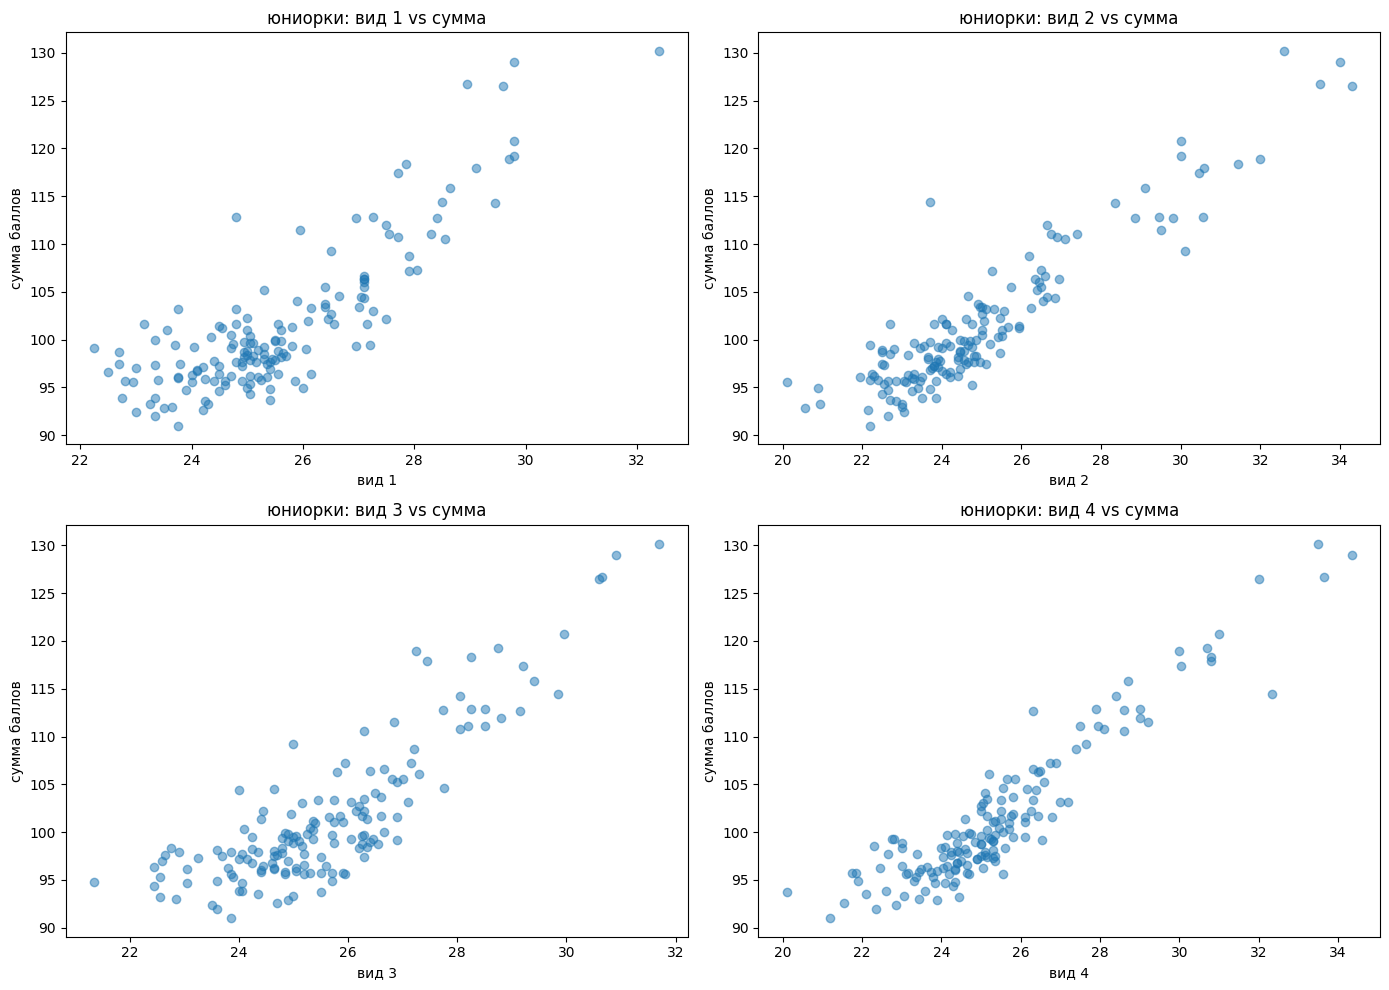

In [45]:
#диаграммы рассеяния для юниорок: сумма VS виды

fig,axes=plt.subplots(2,2,figsize=(14,10))

# юниорки: вид1 VS сумма
axes[0,0].scatter(df_j['score1'],df_j['total'],alpha=0.5)
axes[0,0].set_xlabel('вид 1')
axes[0,0].set_ylabel('сумма баллов')
axes[0,0].set_title('юниорки: вид 1 vs сумма')

axes[0,1].scatter(df_j['score2'],df_j['total'],alpha=0.5)
axes[0,1].set_xlabel('вид 2')
axes[0,1].set_ylabel('сумма баллов')
axes[0,1].set_title('юниорки: вид 2 vs сумма')

axes[1,0].scatter(df_j['score3'],df_j['total'],alpha=0.5)
axes[1,0].set_xlabel('вид 3')
axes[1,0].set_ylabel('сумма баллов')
axes[1,0].set_title('юниорки: вид 3 vs сумма')

axes[1,1].scatter(df_j['score4'],df_j['total'],alpha=0.5)
axes[1,1].set_xlabel('вид 4')
axes[1,1].set_ylabel('сумма баллов')
axes[1,1].set_title('юниорки: вид 4 vs сумма')

plt.tight_layout()
plt.show()

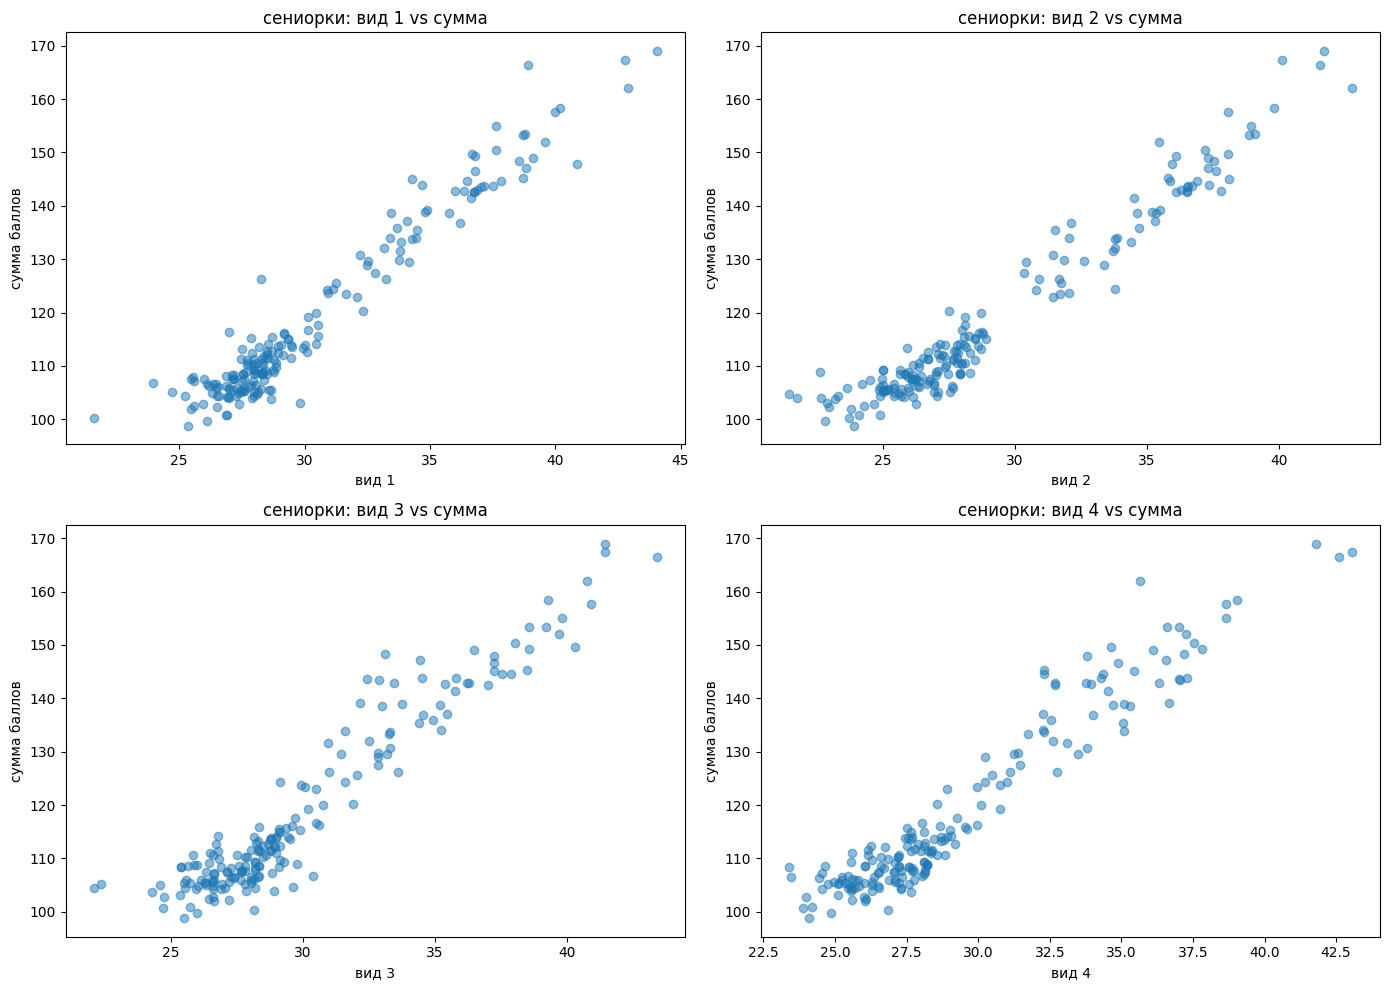

In [46]:
#диаграммы рассеяния для сениорок: сумма VS виды

fig,axes=plt.subplots(2,2,figsize=(14,10))

# юниорки: вид1 VS сумма
axes[0,0].scatter(df_s['score1'],df_s['total'],alpha=0.5)
axes[0,0].set_xlabel('вид 1')
axes[0,0].set_ylabel('сумма баллов')
axes[0,0].set_title('сениорки: вид 1 vs сумма')

axes[0,1].scatter(df_s['score2'],df_s['total'],alpha=0.5)
axes[0,1].set_xlabel('вид 2')
axes[0,1].set_ylabel('сумма баллов')
axes[0,1].set_title('сениорки: вид 2 vs сумма')

axes[1,0].scatter(df_s['score3'],df_s['total'],alpha=0.5)
axes[1,0].set_xlabel('вид 3')
axes[1,0].set_ylabel('сумма баллов')
axes[1,0].set_title('сениорки: вид 3 vs сумма')

axes[1,1].scatter(df_s['score4'],df_s['total'],alpha=0.5)
axes[1,1].set_xlabel('вид 4')
axes[1,1].set_ylabel('сумма баллов')
axes[1,1].set_title('сениорки: вид 4 vs сумма')

plt.tight_layout()
plt.show()

In [47]:
df['competition_year']=pd.to_datetime(df['competition_date']).dt.year

max_year=df.groupby('name')['competition_year'].max().reset_index()
max_year.columns=['name','max_year']
max_year['active']=(max_year['max_year']==2025).astype(int)

df=pd.merge(df,max_year,on='name',how='left')

df

,competition,competition_date,name,year_of_birth,region,rank,category,score1,score2,score3,score4,total,place,competition_year,max_year,active
0,Первенство России,2023-02-12,Проценко Юлия,2011,Москва,1 разряд,юниорка,32.40,32.60,31.70,33.50,130.20,1,2023,2025,1
1,Первенство России,2023-02-12,Репина Анна,2011,Москва,1 разряд,юниорка,29.80,34.00,30.90,34.35,129.05,2,2023,2025,1
2,Первенство России,2023-02-12,Гераськина Елизавета,2011,Москва,1 разряд,юниорка,28.95,33.50,30.65,33.65,126.75,3,2023,2025,1
3,Первенство России,2023-02-12,Яблочкина Кира,2011,ДФО,1 разряд,юниорка,29.60,34.30,30.60,32.00,126.50,4,2023,2023,0
4,Первенство России,2023-02-12,Савинова Ксения,2011,СЗФО,1 разряд,юниорка,29.80,30.00,29.95,31.00,120.75,5,2023,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Кубок России,2025-12-03,Николаенко Владислава,2005,ПФО,МСМК,сениорка,27.90,22.65,27.85,25.55,103.95,16,2025,2025,1
337,Кубок России,2025-12-03,Букина Милена,2009,СФО,МСМК,сениорка,25.60,24.30,26.45,26.10,102.45,17,2025,2025,1
338,Кубок России,2025-12-03,Вакуленко Анна,2009,ЮФО,КМС,сениорка,26.50,22.95,27.20,25.60,102.25,18,2025,2025,1
339,Кубок России,2025-12-03,Галочкина Алина,2009,ЦФО,МС,сениорка,26.10,22.80,26.00,24.85,99.75,19,2025,2025,1


In [48]:
df['competition_date']=pd.to_datetime(df['competition_date'])
df=df.sort_values(['name','competition_date'])
df['rest_days']=df.groupby('name')['competition_date'].diff().dt.days.fillna(30)
df['trend3']=df.groupby('name')['total'].rolling(3).apply(
    lambda x: x.iloc[-1]-x.iloc[0] if len(x)==3 else 0
).reset_index(level=0, drop=True)

#процент от личного рекорда
df['record']=df.groupby('name')['total'].transform('max')
df['percentage_of_record']=df['total']/df['record']

df['season_consistency']=df.groupby(['name', df['competition_date'].dt.year])['total'].transform('std').fillna(0)
df['top3_frequency']=df.groupby('name')['place'].transform(lambda x: (x<=3).mean())
df['consistent_growth'] = df['trend3'] * df['top3_frequency'] / (df['season_consistency'] + 1)

In [49]:
df_junior=df[df['category']=='юниорка']
df_senior=df[df['category']=='сениорка']


print(f'всего записей {len(df)}, из них уникальных гимнасток: {df['name'].nunique()}')
print(f'записей о юниорках {len(df_junior)}, самих юниорок: {df_junior['name'].nunique()}')
print(f'записей о сениорках {len(df_senior)}, самих сениорок: {df_senior['name'].nunique()}')

всего записей 341, из них уникальных гимнасток: 103
записей о юниорках 154, самих юниорок: 49
записей о сениорках 187, самих сениорок: 57


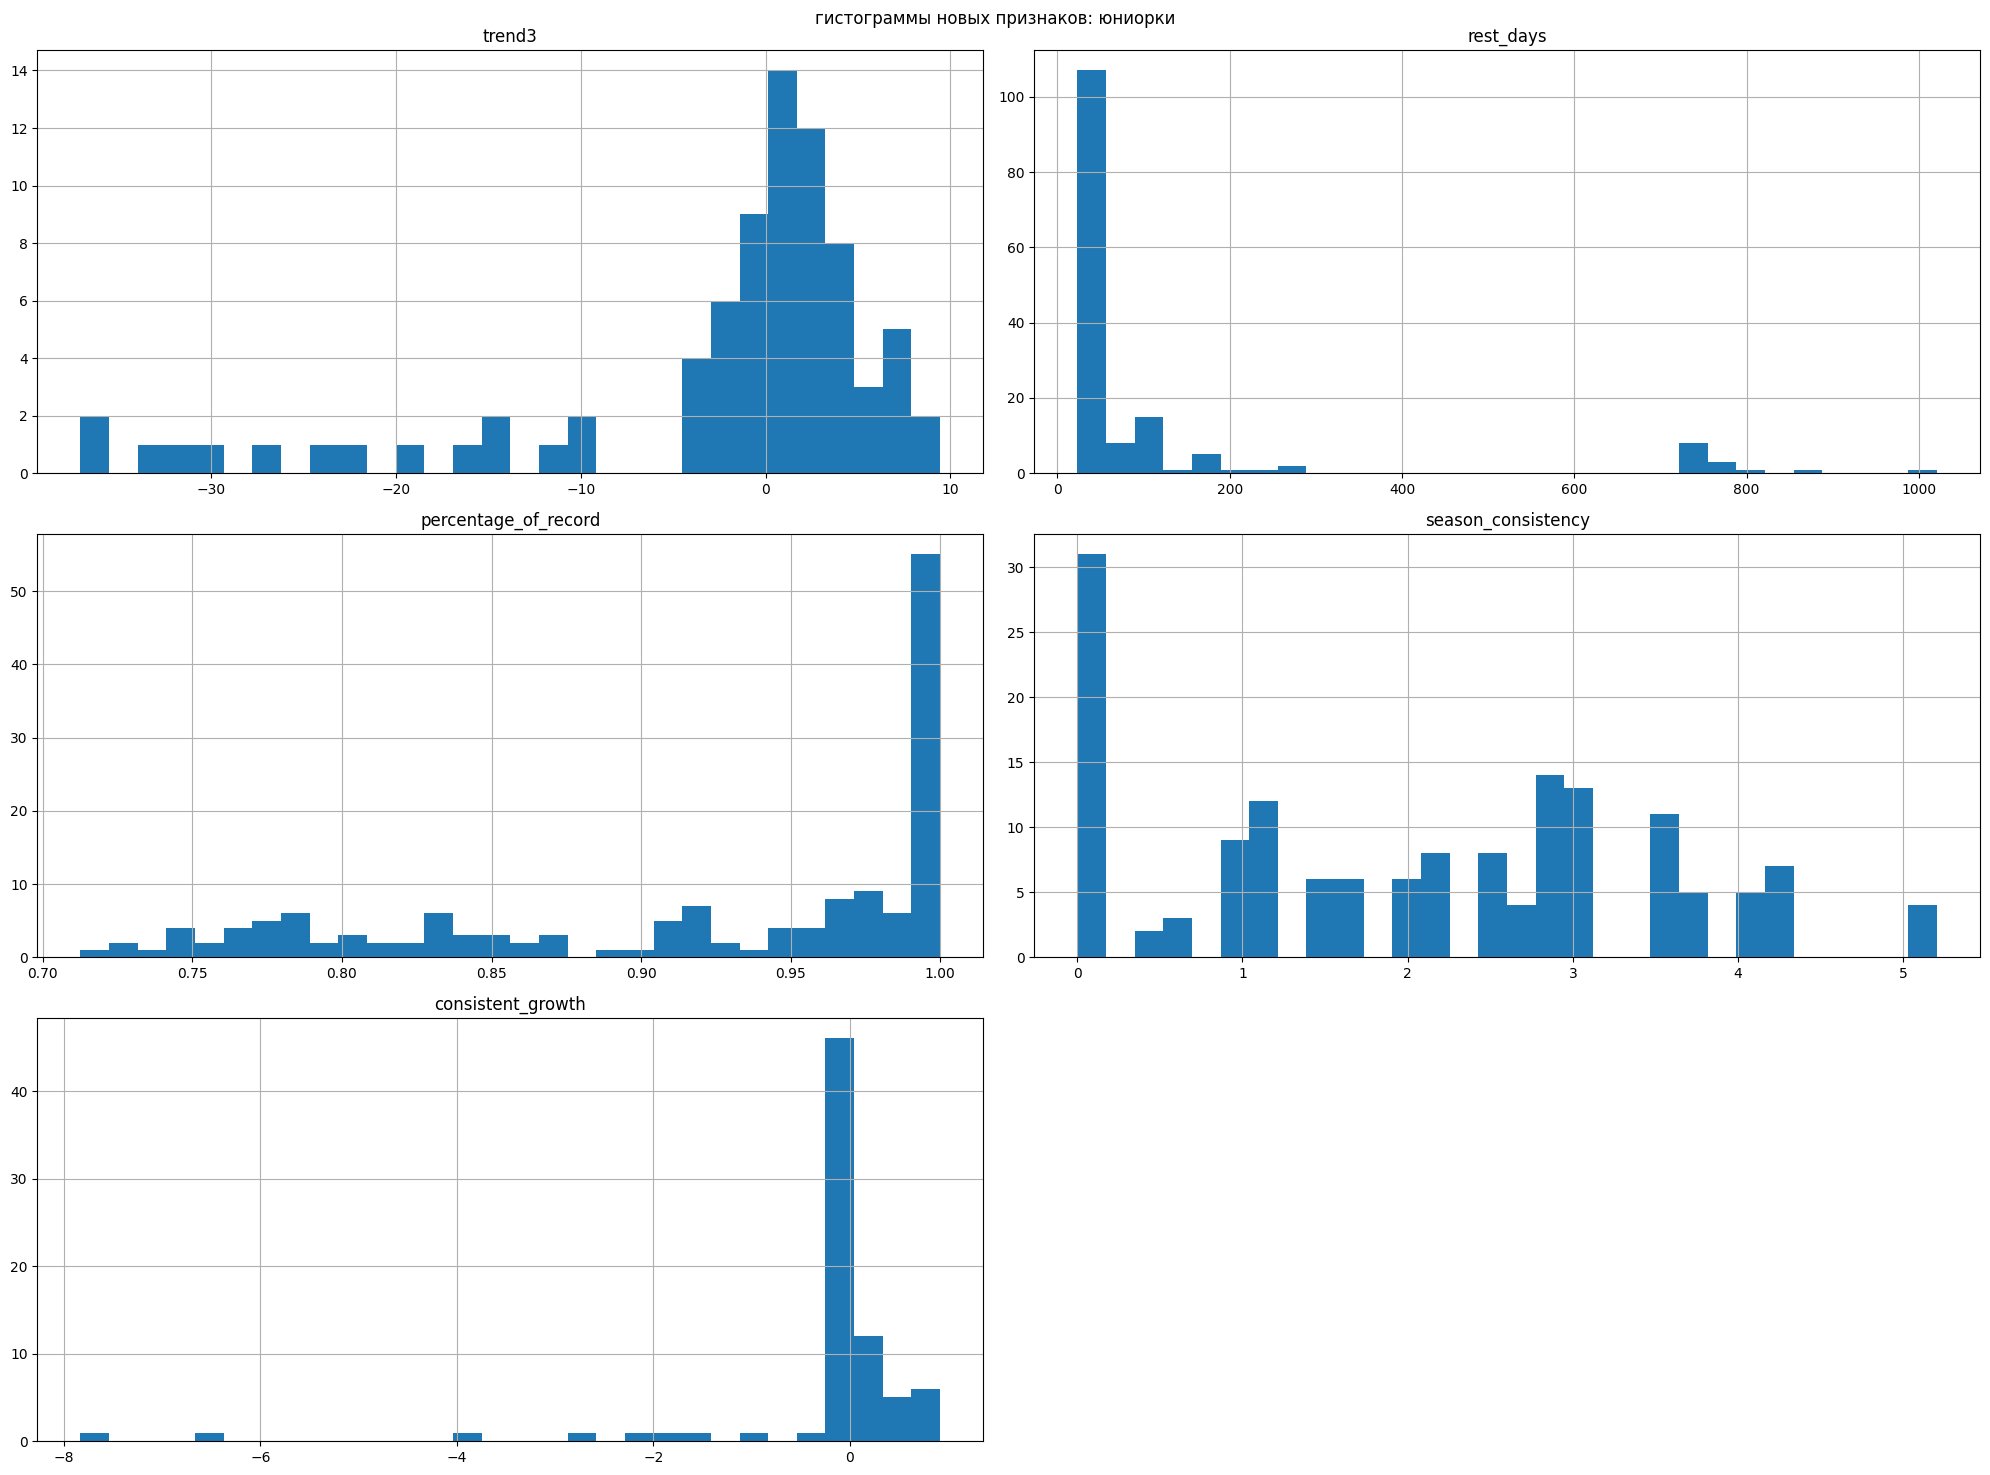

In [50]:
features_new = ['trend3', 'rest_days', 'percentage_of_record',
              'season_consistency', 'consistent_growth']
df_junior[features_new].hist(bins=30,figsize=(20,15))
plt.suptitle('гистограммы новых признаков: юниорки')
plt.tight_layout()

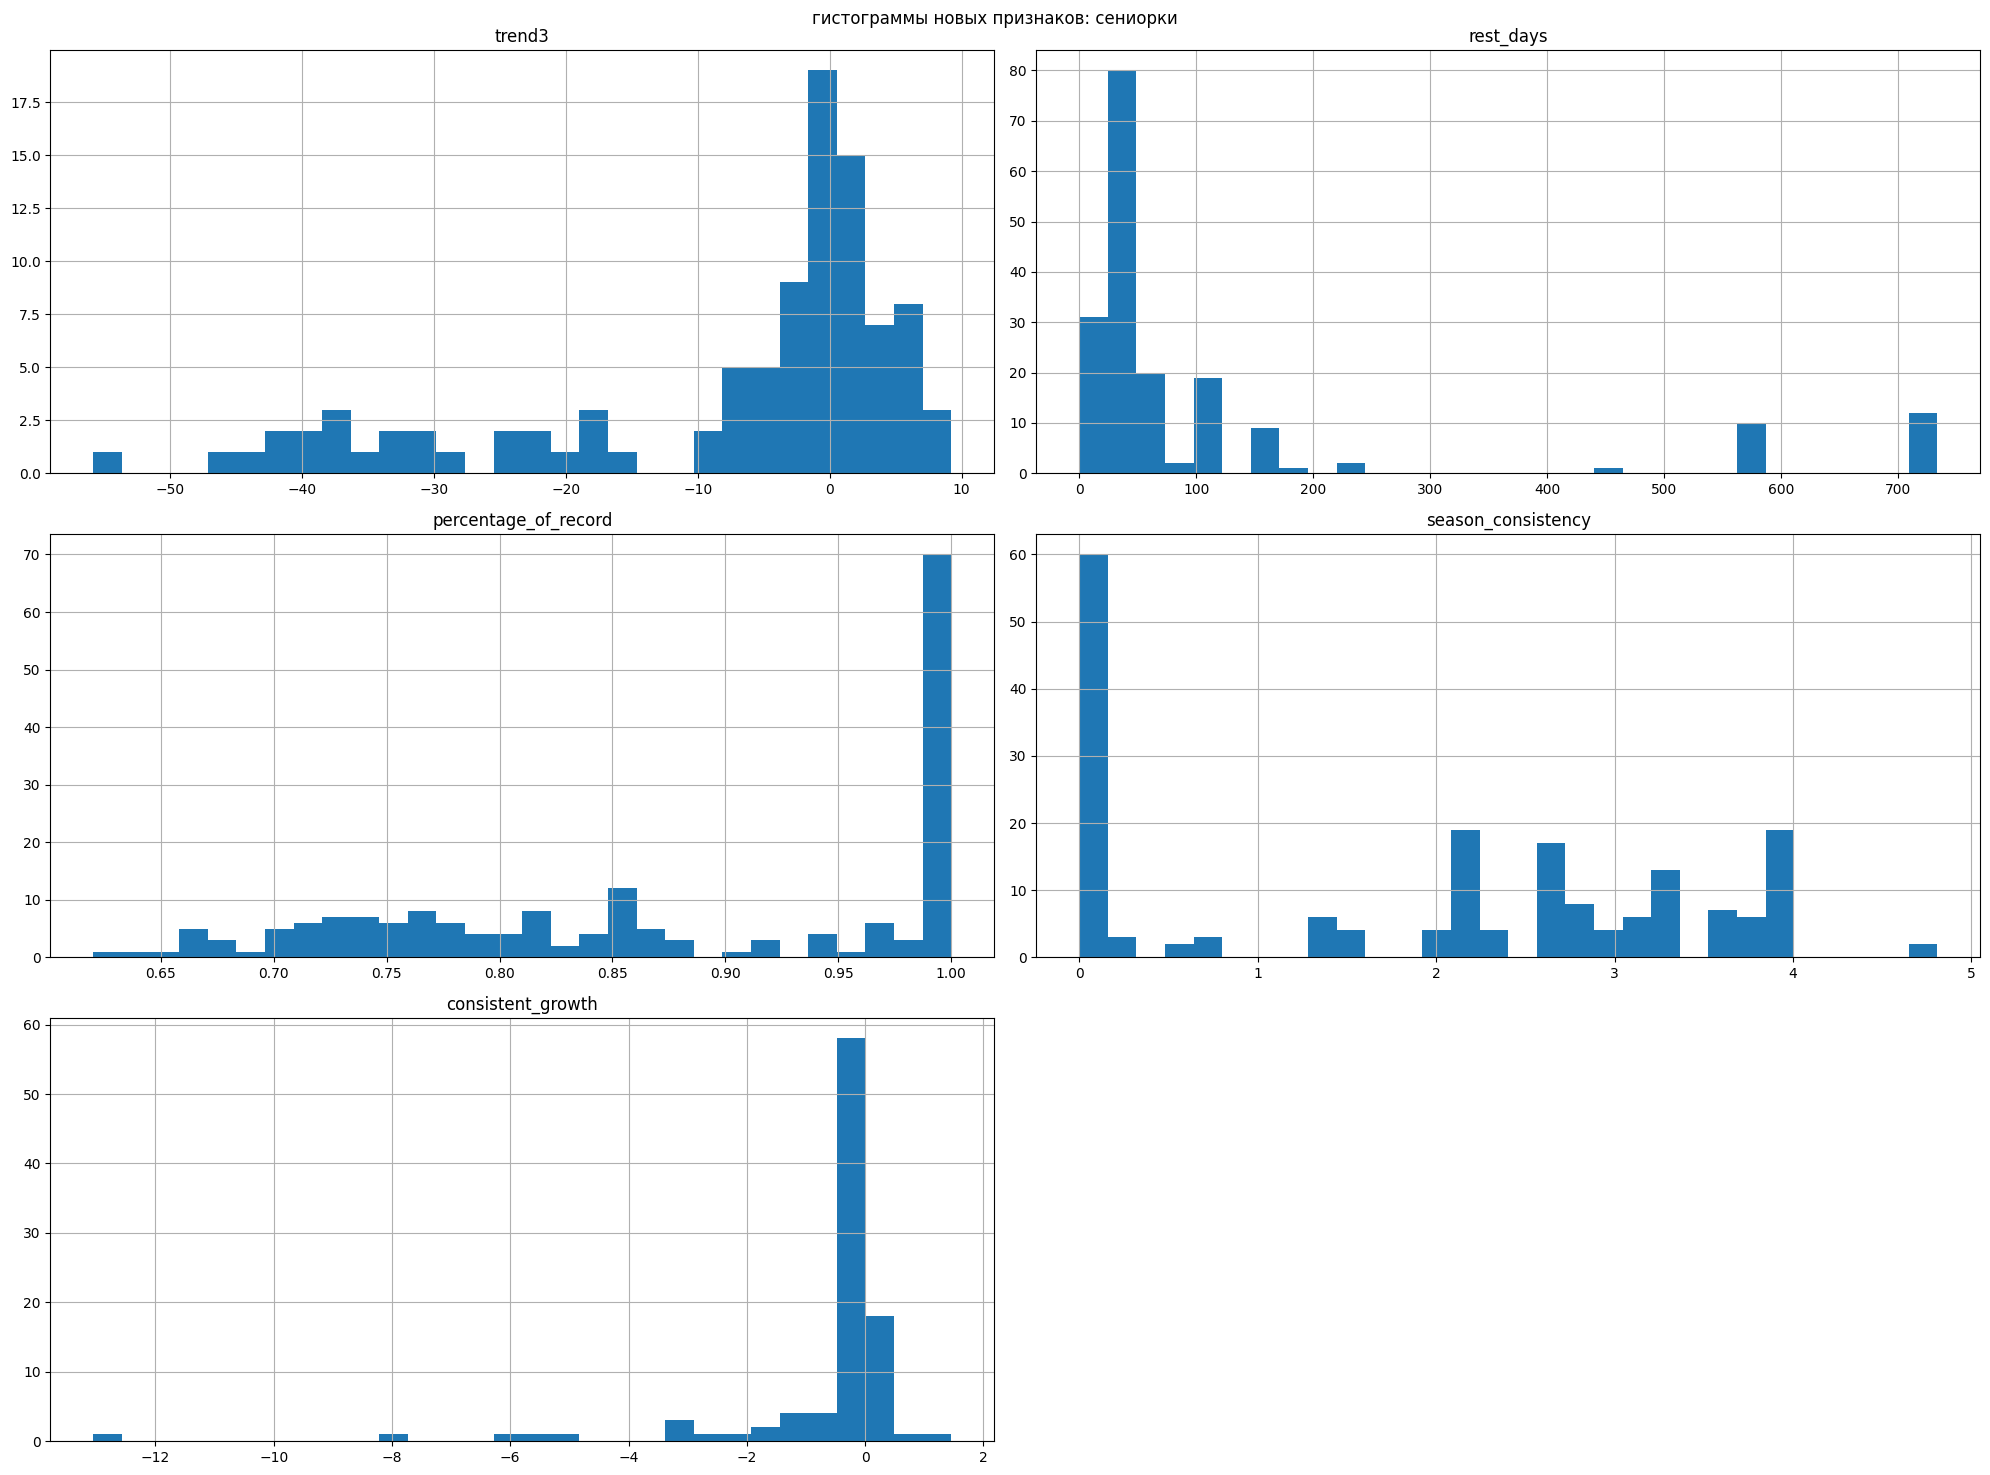

In [51]:
df_senior[features_new].hist(bins=30,figsize=(20,15))
plt.suptitle('гистограммы новых признаков: сениорки')
plt.tight_layout()

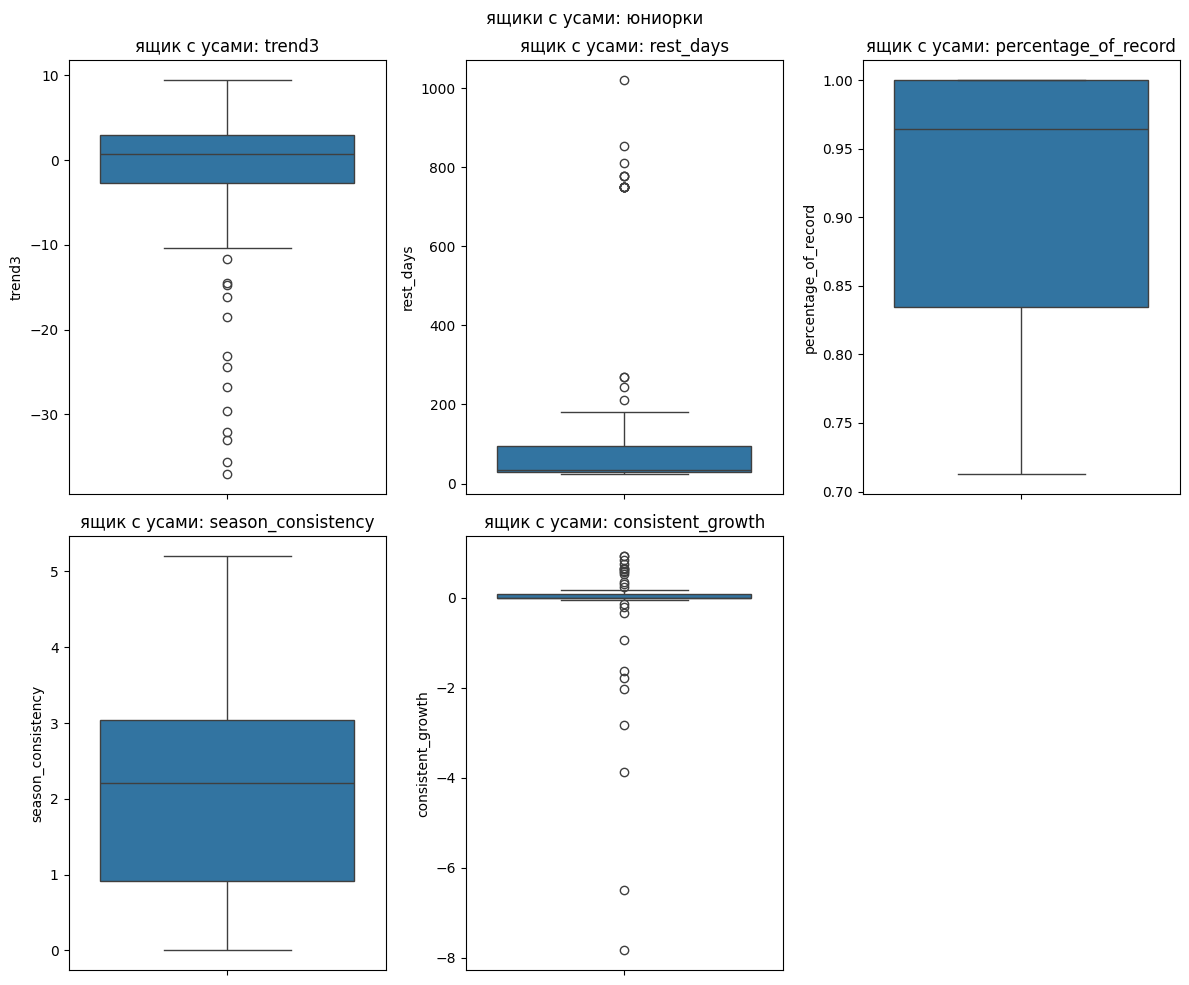

In [52]:
plt.figure(figsize=(12,10))
for i,col in enumerate(features_new,1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df_junior,y=col)
  plt.title(f'ящик с усами: {col}')
plt.suptitle(f'ящики с усами: юниорки')
plt.tight_layout()

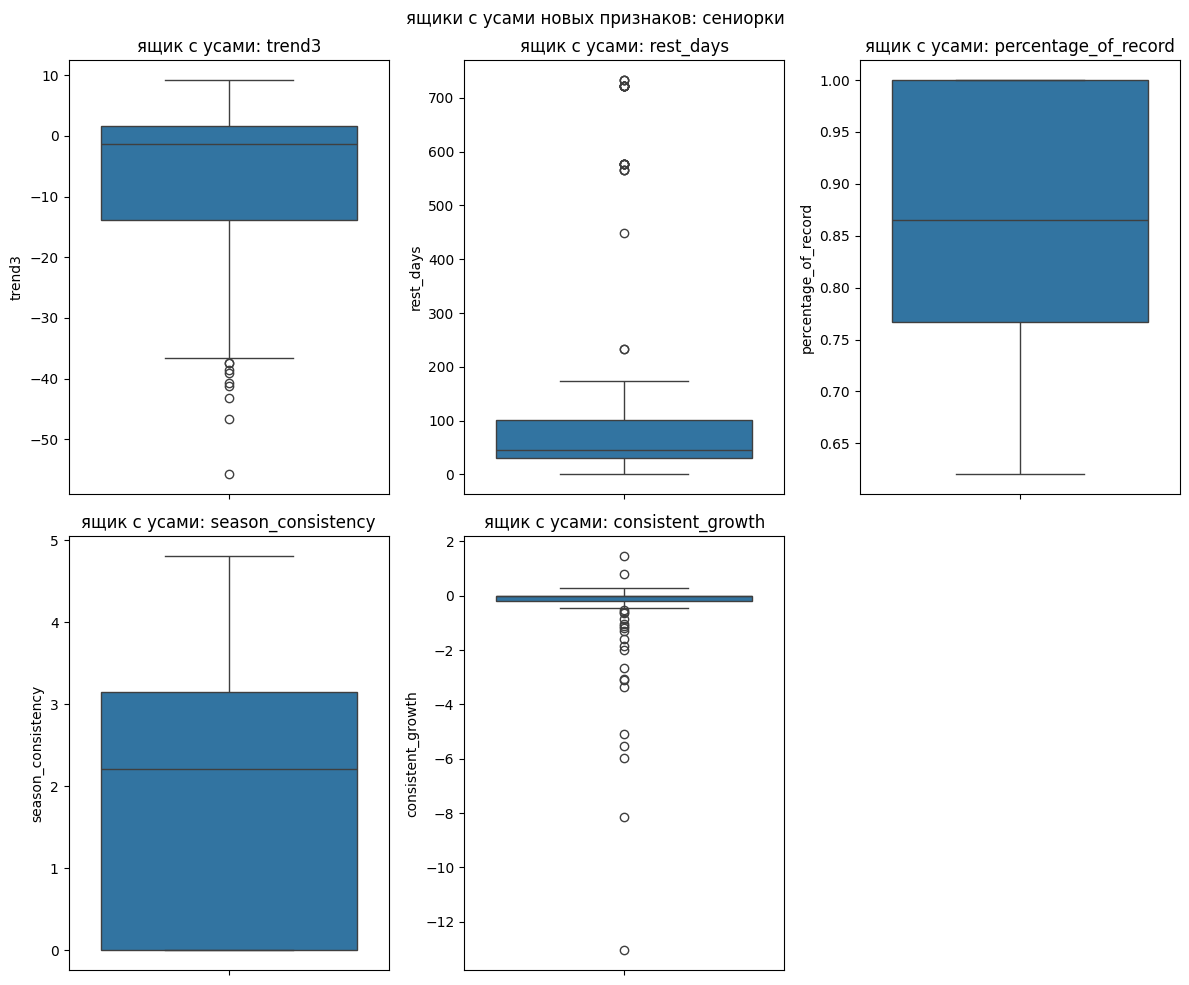

In [53]:
plt.figure(figsize=(12,10))
for i,col in enumerate(features_new,1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df_senior,y=col)
  plt.title(f'ящик с усами: {col}')
plt.suptitle('ящики с усами новых признаков: сениорки')
plt.tight_layout()

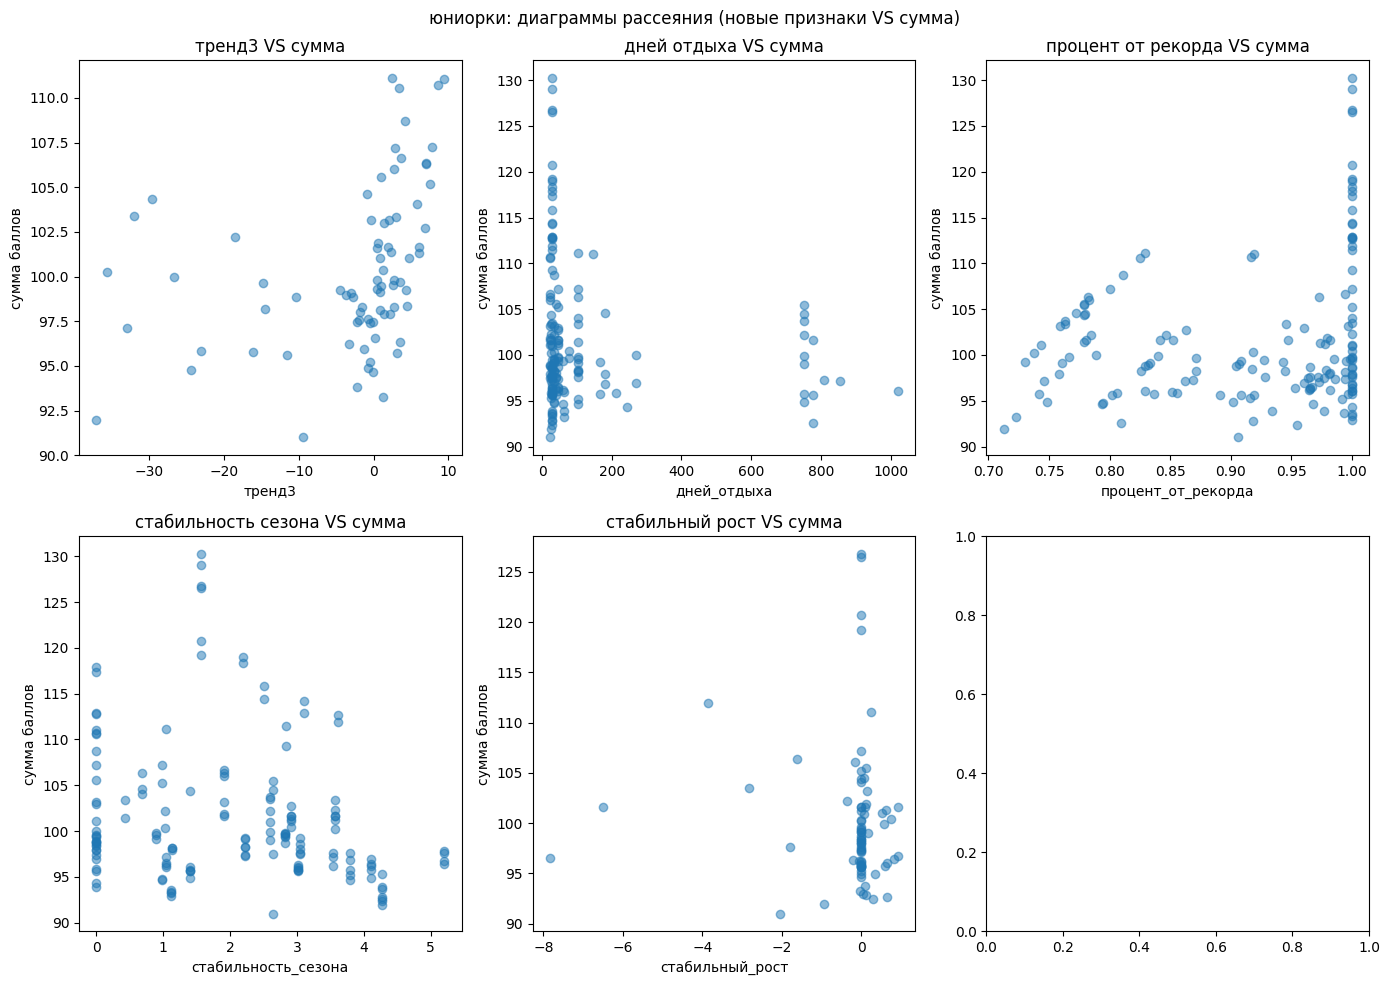

In [54]:
fig,axes=plt.subplots(2,3,figsize=(14,10))

# юниорки
# тренд3 VS сумма
axes[0,0].scatter(df_junior['trend3'],df_junior['total'],alpha=0.5)
axes[0,0].set_xlabel('тренд3')
axes[0,0].set_ylabel('сумма баллов')
axes[0,0].set_title('тренд3 VS сумма')

#дней_отдыха VS сумма
axes[0,1].scatter(df_junior['rest_days'],df_junior['total'],alpha=0.5)
axes[0,1].set_xlabel('дней_отдыха')
axes[0,1].set_ylabel('сумма баллов')
axes[0,1].set_title('дней отдыха VS сумма')

axes[0,2].scatter(df_junior['percentage_of_record'],df_junior['total'],alpha=0.5)
axes[0,2].set_xlabel('процент_от_рекорда')
axes[0,2].set_ylabel('сумма баллов')
axes[0,2].set_title('процент от рекорда VS сумма')

axes[1,0].scatter(df_junior['season_consistency'],df_j['total'],alpha=0.5)
axes[1,0].set_xlabel('стабильность_сезона')
axes[1,0].set_ylabel('сумма баллов')
axes[1,0].set_title('стабильность сезона VS сумма')

axes[1,1].scatter(df_junior['consistent_growth'],df_j['total'],alpha=0.5)
axes[1,1].set_xlabel('стабильный_рост')
axes[1,1].set_ylabel('сумма баллов')
axes[1,1].set_title('стабильный рост VS сумма')

plt.suptitle('юниорки: диаграммы рассеяния (новые признаки VS сумма)')
plt.tight_layout()

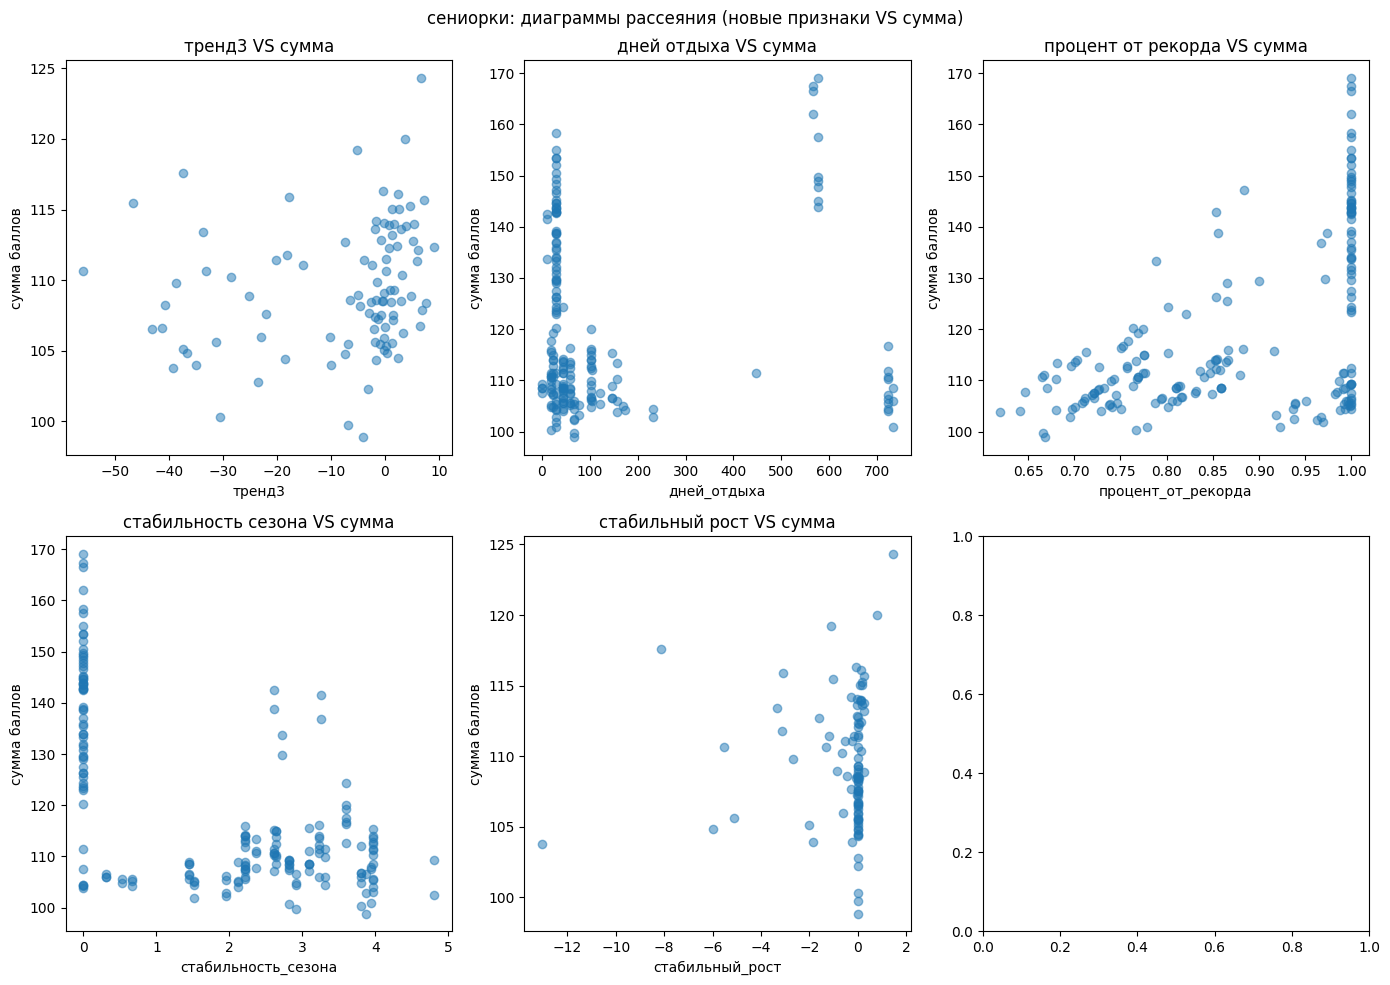

In [55]:
fig,axes=plt.subplots(2,3,figsize=(14,10))

# сениорки
# тренд3 VS сумма
axes[0,0].scatter(df_senior['trend3'],df_senior['total'],alpha=0.5)
axes[0,0].set_xlabel('тренд3')
axes[0,0].set_ylabel('сумма баллов')
axes[0,0].set_title('тренд3 VS сумма')

#дней_отдыха VS сумма
axes[0,1].scatter(df_senior['rest_days'],df_senior['total'],alpha=0.5)
axes[0,1].set_xlabel('дней_отдыха')
axes[0,1].set_ylabel('сумма баллов')
axes[0,1].set_title('дней отдыха VS сумма')

axes[0,2].scatter(df_senior['percentage_of_record'],df_senior['total'],alpha=0.5)
axes[0,2].set_xlabel('процент_от_рекорда')
axes[0,2].set_ylabel('сумма баллов')
axes[0,2].set_title('процент от рекорда VS сумма')

axes[1,0].scatter(df_senior['season_consistency'],df_senior['total'],alpha=0.5)
axes[1,0].set_xlabel('стабильность_сезона')
axes[1,0].set_ylabel('сумма баллов')
axes[1,0].set_title('стабильность сезона VS сумма')

axes[1,1].scatter(df_senior['consistent_growth'],df_senior['total'],alpha=0.5)
axes[1,1].set_xlabel('стабильный_рост')
axes[1,1].set_ylabel('сумма баллов')
axes[1,1].set_title('стабильный рост VS сумма')

plt.suptitle('сениорки: диаграммы рассеяния (новые признаки VS сумма)')
plt.tight_layout()

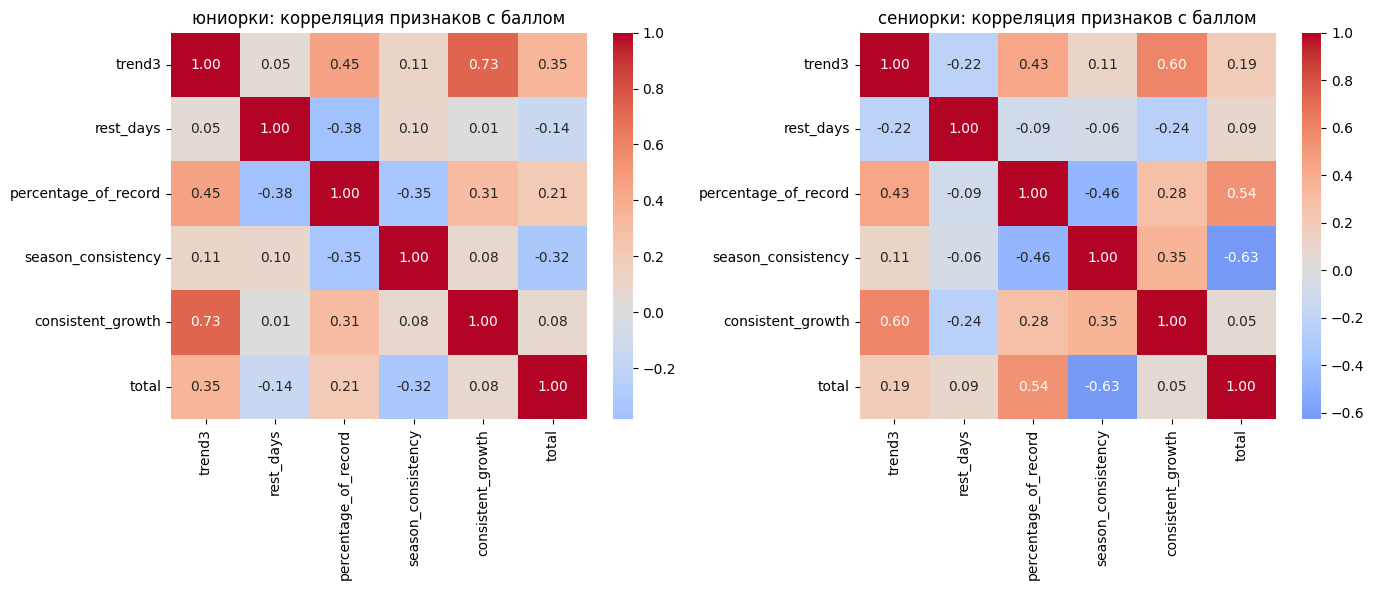

In [56]:
# корреляция новых признаков с суммой
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# юниорки
features_j =['trend3', 'rest_days', 'percentage_of_record',
             'season_consistency', 'consistent_growth','total']

corr_j = df_junior[features_j].corr()
sns.heatmap(corr_j, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[0])
axes[0].set_title('юниорки: корреляция признаков с баллом')

# сениорки
features_s =['trend3', 'rest_days', 'percentage_of_record',
             'season_consistency', 'consistent_growth','total']
corr_s = df_senior[features_s].corr()
sns.heatmap(corr_s, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[1])
axes[1].set_title('сениорки: корреляция признаков с баллом')

plt.tight_layout()
plt.show()

In [57]:
#подготовка данных для обучения

def prepare_train_data(df):
  '''три прошлых выступления -> прогноз следующего'''
  train_data=[]
  for name in df['name'].unique():
    gymnast=df[df['name']==name].sort_values('competition_date')

    if len(gymnast)>=4:
      for i in range(3,len(gymnast)):
        past=gymnast.iloc[i-3:i]
        future=gymnast.iloc[i]

        features={
            'name':name,
            'competition_year':future['competition_year'],

            #признаки из прошлых выступлений
            'total_1back':past.iloc[-1]['total'],
            'total_2back':past.iloc[-2]['total'],
            'total_3back':past.iloc[-3]['total'],
            'avg_last3':past['total'].mean(),
            'max_last3':past['total'].max(),
            'consistency_last3':past['total'].std(),
            'trend':past.iloc[-1]['total']-past.iloc[-2]['total'],

            'trend3_1back':past.iloc[-1]['trend3'], #тренд на последнем выступлении
            'rest_days': past.iloc[-1]['rest_days'], #дней отдыха перед последним выступлением
            'percentage_rec_1back':past.iloc[-1]['percentage_of_record'], #процент от рекорда на последнем выступлении

            'avg_trend3':past['trend3'].mean(),
            'avg_percentage_rec':past['percentage_of_record'].mean(),
            'record_before':past['record'].iloc[-1],
            'record_growth':past.iloc[-1]['record']-past.iloc[-2]['record'],

            'season_consistency':past.iloc[-1]['season_consistency'],
            'top3_frequency':past.iloc[-1]['top3_frequency'],
            'consistent_growth':past.iloc[-1]['consistent_growth'],
            #цели
            'future_total':future['total']
        }
        train_data.append(features)
  return pd.DataFrame(train_data)

#создаем обучающие данные
train_junior=prepare_train_data(df_junior)
train_senior=prepare_train_data(df_senior)

train_junior.head()

,name,competition_year,total_1back,total_2back,total_3back,avg_last3,max_last3,consistency_last3,trend,trend3_1back,rest_days,percentage_rec_1back,avg_trend3,avg_percentage_rec,record_before,record_growth,season_consistency,top3_frequency,consistent_growth,future_total
0,Баранова Варвара,2025,99.70,97.00,96.20,97.633333,99.70,1.833939,2.70,3.50,45.0,1.000000,3.500000,0.979271,99.70,0.0,1.570165,0.0,0.0,99.55
1,Баранова Варвара,2025,99.55,99.70,97.00,98.750000,99.70,1.517399,-0.15,2.55,102.0,0.998495,3.025000,0.990471,99.70,0.0,1.570165,0.0,0.0,97.45
2,Баранова Варвара,2025,97.45,99.55,99.70,98.900000,99.70,1.257975,-2.10,-2.25,23.0,0.977432,1.266667,0.991976,99.70,0.0,1.570165,0.0,-0.0,96.25
3,Дюпина Кристина,2025,95.85,99.90,118.95,104.900000,118.95,12.335011,-4.05,-23.10,26.0,0.805801,-23.100000,0.881883,118.95,0.0,2.227873,0.0,-0.0,98.30
4,Дюпина Кристина,2025,98.30,95.85,99.90,98.016667,99.90,2.039812,2.45,-1.60,33.0,0.826398,-12.350000,0.824016,118.95,0.0,2.227873,0.0,-0.0,102.70


In [58]:
train_senior.head()

,name,competition_year,total_1back,total_2back,total_3back,avg_last3,max_last3,consistency_last3,trend,trend3_1back,rest_days,percentage_rec_1back,avg_trend3,avg_percentage_rec,record_before,record_growth,season_consistency,top3_frequency,consistent_growth,future_total
0,Беспалова Виктория,2025,108.35,107.65,100.80,105.600000,108.35,4.171630,0.70,7.55,59.0,0.991308,7.550000,0.966148,109.3,0.0,2.819954,0.0,0.0,109.3
1,Беспалова Виктория,2025,109.30,108.35,107.65,108.433333,109.30,0.828151,0.95,1.65,45.0,1.000000,4.600000,0.992071,109.3,0.0,2.819954,0.0,0.0,109.3
2,Беспалова Виктория,2025,109.30,109.30,108.35,108.983333,109.30,0.548483,0.00,0.95,0.0,1.000000,3.383333,0.997103,109.3,0.0,2.819954,0.0,0.0,109.1
3,Беспалова Виктория,2025,109.10,109.30,109.30,109.233333,109.30,0.115470,-0.20,-0.20,102.0,0.998170,0.800000,0.999390,109.3,0.0,2.819954,0.0,-0.0,107.4
4,Беспалова Виктория,2025,107.40,109.10,109.30,108.600000,109.30,1.044031,-1.70,-1.90,23.0,0.982617,-0.383333,0.993596,109.3,0.0,2.819954,0.0,-0.0,108.5


In [59]:
features=['total_1back', 'total_2back', 'total_3back','avg_last3',
          'max_last3','consistency_last3', 'trend','trend3_1back',
          'rest_days','percentage_rec_1back','avg_trend3',
          'avg_percentage_rec', 'record_before','record_growth',
          'season_consistency','top3_frequency','consistent_growth']

#юниорки
X_junior=train_junior[features]
y_junior_score=train_junior['future_total']

#сениорки
X_senior=train_senior[features]
y_senior_score=train_senior['future_total']

In [60]:
#обучение моделей

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_models(X,y):
  X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

  models={
      'LinearRegression': make_pipeline(StandardScaler(),LinearRegression()),
      'RandomForestRegressor': RandomForestRegressor(n_estimators=300,max_depth=10, min_samples_leaf=2, min_samples_split=5, max_samples=0.8, max_features='sqrt', random_state=42, n_jobs=-1),
      'XGBRegressor': XGBRegressor(n_estimators=300, max_depth=3,subsample=0.7, colsample_bytree=0.7, colsample_bylevel=0.7, reg_alpha=0.5, reg_lambda=1.0, learning_rate=0.05, random_state=42, n_jobs=-1)
  }
  res={}
  for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    res[name]={
        'R^2': r2_score(y_test, y_pred),
        'MAE':mean_absolute_error(y_test, y_pred),
        'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),
        'model':model
    }
  return res

#юниорки
print('юниорки:')
res_j=compare_models(X_junior, y_junior_score)
for name,metrics in res_j.items():
  print(f'{name}:\nMAE={metrics['MAE']:.3f},\nRMSE={metrics['RMSE']:.3f},\nR^2={metrics['R^2']:.3f}')
print()
#сениорки
res_s=compare_models(X_senior,y_senior_score)
print('сениорки: ')
for name,metrics in res_s.items():
  print(f'{name}:\nMAE={metrics['MAE']:.3f},\nRMSE={metrics['RMSE']:.3f},\nR^2={metrics['R^2']:.3f}')


юниорки:
LinearRegression:
MAE=3.597,
RMSE=4.330,
R^2=0.226
RandomForestRegressor:
MAE=3.223,
RMSE=4.392,
R^2=0.204
XGBRegressor:
MAE=2.824,
RMSE=3.957,
R^2=0.354

сениорки: 
LinearRegression:
MAE=4.248,
RMSE=4.966,
R^2=-0.115
RandomForestRegressor:
MAE=3.228,
RMSE=3.790,
R^2=0.351
XGBRegressor:
MAE=3.223,
RMSE=3.987,
R^2=0.281


In [61]:
# XGBoost для юниорок (тк у него для юниорок лучшие показатели)
xgb_j=XGBRegressor(n_estimators=300,learning_rate=0.05, subsample=0.7, colsample_bytree=0.7, colsample_bylevel=0.7,reg_alpha=1, reg_lambda=2,max_depth=4,random_state=42)
xgb_j.fit(X_junior, y_junior_score)

# RandomForest для сениорок (тк у него для сениорок лучше показатели)
rf_s=RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=2, min_samples_split=5, max_samples=0.8, max_features='sqrt', random_state=42)
rf_s.fit(X_senior, y_senior_score)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=0.8,
                      min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [62]:
active_junior=df_junior[df_junior['active']==1]['name'].unique()
active_senior=df_senior[df_senior['active']==1]['name'].unique()

print(f'активных юниорок (принимавших участие в 2025): {len(active_junior)}')
print(f'активных сениорок (принимавших участие в 2025): {len(active_senior)}')

активных юниорок (принимавших участие в 2025): 40
активных сениорок (принимавших участие в 2025): 33


In [63]:
def prepare_championship2026(df,active):
  '''подготовка данных активных гимнасток для чемпионата россии 2026'''
  pred_data=[]
  for name in active:
    gymnast=df[df['name']==name].sort_values('competition_date')

    if len(gymnast)>=3:
      last3=gymnast.tail(3)
      features={
          'name':name,
          'total_1back':last3.iloc[-1]['total'],
          'total_2back':last3.iloc[-2]['total'],
          'total_3back':last3.iloc[-3]['total'],
          'avg_last3':last3['total'].mean(),
          'max_last3':last3['total'].max(),
          'consistency_last3':last3['total'].std(),
          'trend':last3.iloc[-1]['total']-last3.iloc[-2]['total'],

          'trend3_1back': last3.iloc[-1]['trend3'],
          'rest_days':last3.iloc[-1]['rest_days'],
          'percentage_rec_1back':last3.iloc[-1]['percentage_of_record'],
          'avg_trend3':last3['trend3'].mean(),
          'avg_percentage_rec':last3['percentage_of_record'].mean(),
          'record_before':last3['record'].iloc[-1],
          'record_growth':last3.iloc[-1]['record']-last3.iloc[-2]['record'],
          'season_consistency':last3.iloc[-1]['season_consistency'],
          'top3_frequency':last3.iloc[-1]['top3_frequency'],
          'consistent_growth':last3.iloc[-1]['consistent_growth']
      }
      pred_data.append(features)
  return pd.DataFrame(pred_data)

pred_j_2026=prepare_championship2026(df_junior,active_junior)
pred_s_2026=prepare_championship2026(df_senior,active_senior)

X_pred_j=pred_j_2026[features]
pred_j_2026['prediction_score']=xgb_j.predict(X_pred_j)

X_pred_s=pred_s_2026[features]
pred_s_2026['prediction_score']=rf_s.predict(X_pred_s)

In [64]:
pred_j_2026=pred_j_2026.sort_values('prediction_score', ascending=False)
pred_j_2026.head(5)

,name,total_1back,total_2back,total_3back,avg_last3,max_last3,consistency_last3,trend,trend3_1back,rest_days,percentage_rec_1back,avg_trend3,avg_percentage_rec,record_before,record_growth,season_consistency,top3_frequency,consistent_growth,prediction_score
6,Ильтерякова София,110.55,111.10,107.20,109.616667,111.10,2.110884,-0.55,3.35,23.0,0.825000,2.866667,0.818035,134.00,0.0,2.911643,0.857143,0.734072,108.831406
16,Савинова Ксения,110.75,111.05,102.20,108.000000,111.05,5.025187,-0.30,8.55,23.0,0.917184,-0.183333,0.894410,120.75,0.0,5.203364,0.600000,0.826971,108.792297
8,Ланцова София,105.55,106.05,104.60,105.400000,106.05,0.736546,-0.50,0.95,41.0,0.779254,0.900000,0.778147,135.45,0.0,1.045586,0.500000,0.232207,105.552490
1,Гераськина Елизавета,100.00,94.90,126.75,107.216667,126.75,17.107479,5.10,-26.75,270.0,0.788955,-26.750000,0.845891,126.75,0.0,3.606245,0.666667,-3.871556,103.908524
22,Чевтаева Ева,106.35,103.35,99.30,103.000000,106.35,3.538008,3.00,7.05,23.0,0.973455,3.500000,0.942792,109.25,0.0,3.020665,0.000000,0.000000,103.150085


In [65]:
pred_s_2026=pred_s_2026.sort_values('prediction_score', ascending=False)
pred_s_2026.head(5)

,name,total_1back,total_2back,total_3back,avg_last3,max_last3,consistency_last3,trend,trend3_1back,rest_days,percentage_rec_1back,avg_trend3,avg_percentage_rec,record_before,record_growth,season_consistency,top3_frequency,consistent_growth,prediction_score
3,Борисова Мария,112.70,119.20,120.00,117.300000,120.00,4.003748,-6.50,-7.30,45.0,0.726862,-2.900000,0.756530,155.05,0.0,3.602512,1.000000,-1.586090,114.912555
10,Ковшова Арина,115.65,108.45,108.45,110.850000,115.65,4.156922,7.20,7.20,102.0,0.916040,1.933333,0.878020,126.25,0.0,3.089121,0.142857,0.251539,111.580577
23,Янус Ульяна,108.95,114.05,113.90,112.300000,114.05,2.902154,-5.10,-4.95,45.0,0.814884,-1.466667,0.839940,133.70,0.0,2.217436,0.555556,-0.854718,111.320636
16,Сазонова Екатерина,111.40,110.65,115.25,112.433333,115.25,2.467961,0.75,-3.85,45.0,0.774687,0.350000,0.781873,143.80,0.0,2.609214,0.142857,-0.152388,111.159250
21,Щенятская Милена,108.60,115.05,115.05,112.900000,115.05,3.723909,-6.45,-6.45,45.0,0.731806,-0.850000,0.760782,148.40,0.0,2.630883,0.250000,-0.444107,110.850319


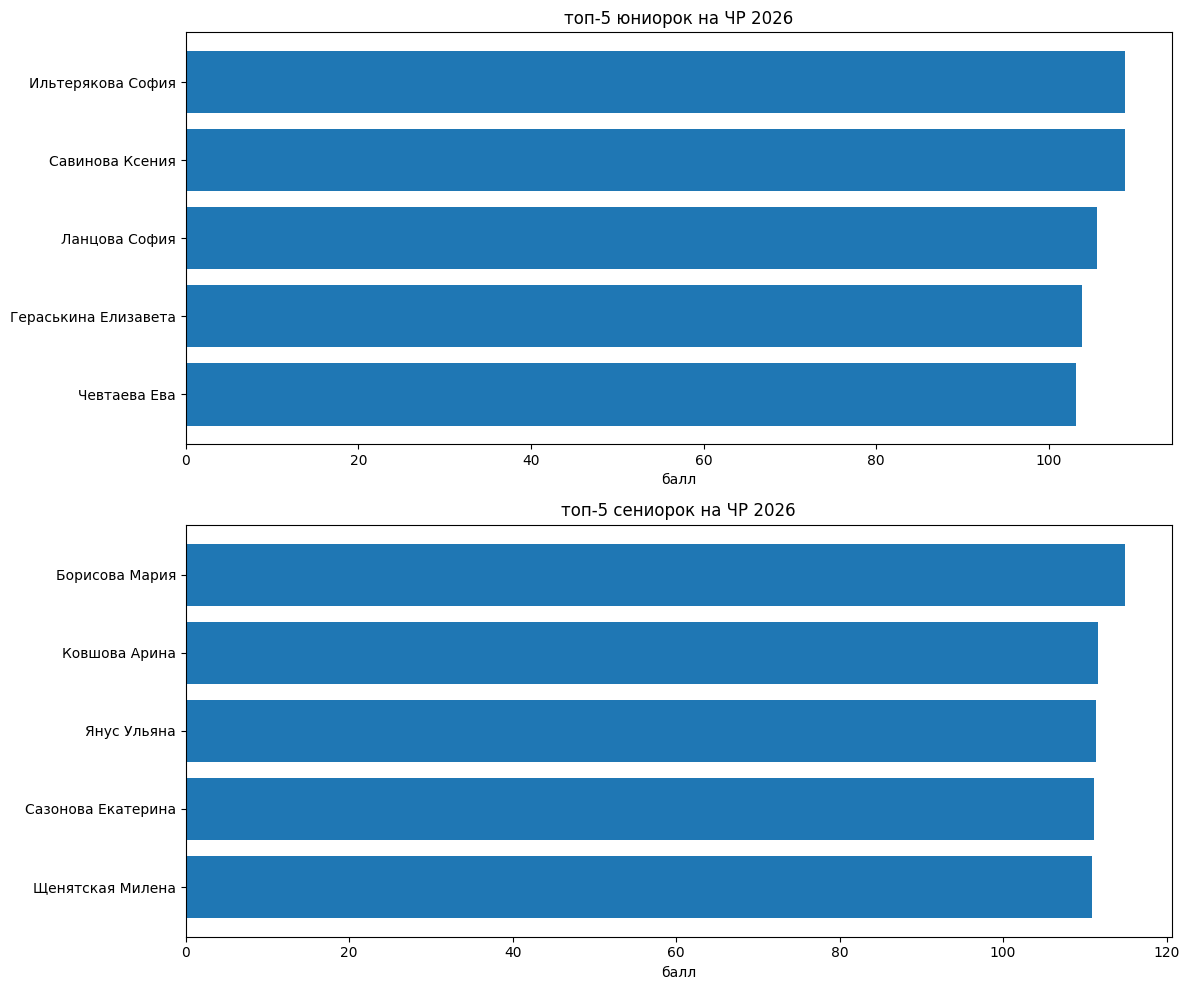

In [66]:
#топ-5 прогноз

fig, axes=plt.subplots(2,1,figsize=(12,10))

#юниорки
top5_j=pred_j_2026.nlargest(5,'prediction_score').sort_values('prediction_score')
axes[0].barh(top5_j['name'],top5_j['prediction_score'])
axes[0].set_xlabel('балл')
axes[0].set_title('топ-5 юниорок на ЧР 2026')

#сениорки
top5_s=pred_s_2026.nlargest(5,'prediction_score').sort_values('prediction_score')
axes[1].barh(top5_s['name'],top5_s['prediction_score'])
axes[1].set_xlabel('балл')
axes[1].set_title('топ-5 сениорок на ЧР 2026')

plt.tight_layout()

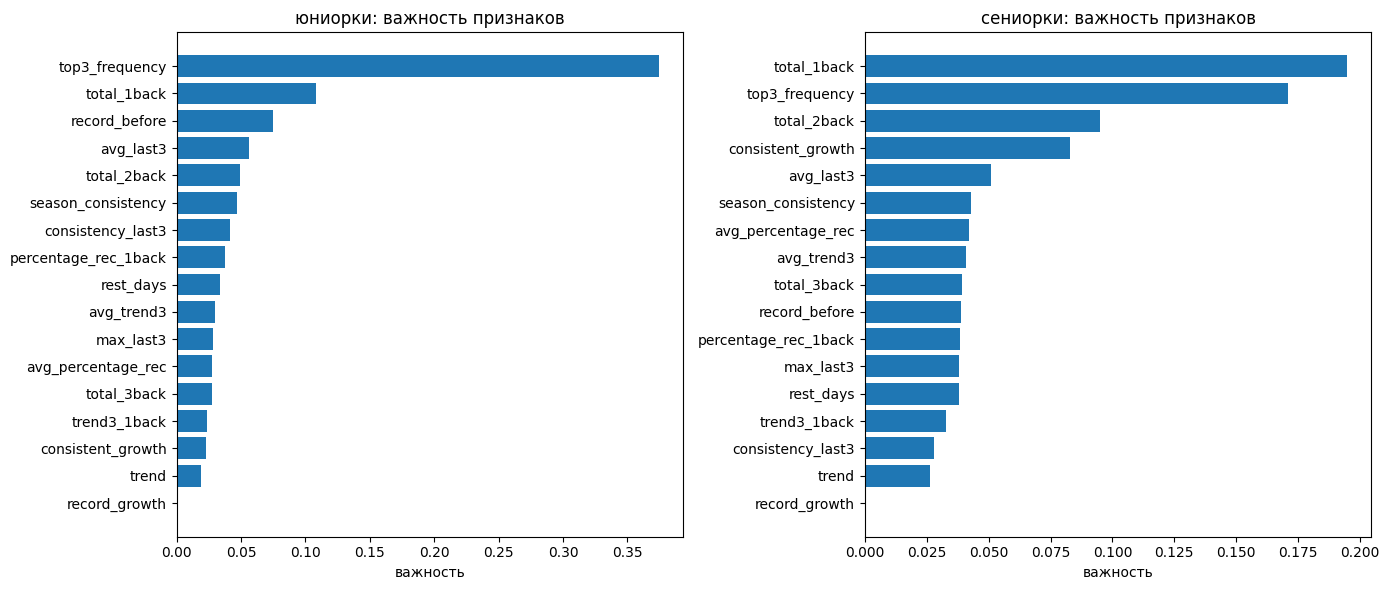

In [67]:
#важность признаков

fig, axes=plt.subplots(1,2,figsize=(14,6))

#юниорки
importance_j=pd.DataFrame(
    {
        'feature':features,
        'importance':xgb_j.feature_importances_
    }
).sort_values('importance')

axes[0].barh(importance_j['feature'],importance_j['importance'])
axes[0].set_xlabel('важность')
axes[0].set_title('юниорки: важность признаков')

#сениорки
importance_s=pd.DataFrame(
    {
        'feature':features,
        'importance':rf_s.feature_importances_
    }
).sort_values('importance')

axes[1].barh(importance_s['feature'],importance_s['importance'])
axes[1].set_xlabel('важность')
axes[1].set_title('сениорки: важность признаков')

plt.tight_layout()